<a href="https://colab.research.google.com/github/minonza/Rating_Prediction/blob/main/ReviewRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_amazon=pd.read_csv("Review_Rating.csv")
df_amazon.head()

,Unnamed: 0,Product_Review,Product_Rating
0,0,Don’t buy this product .Image quality is below...,1.0
1,1,Let’s make one thing clear immediately: the Xi...,4.0
2,2,Awesome,5.0
3,3,Best buy at this price! The display quality is...,5.0
4,4,Very bad experience from Amazon. Very bad came...,1.0


In [ ]:
#checking the shape of the dataset
df_amazon.shape

(30000, 3)

In [ ]:
#checking the datatype
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      30000 non-null  int64  
 1   Product_Review  29800 non-null  object 
 2   Product_Rating  30000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 703.2+ KB


In [ ]:
df_amazon.drop(['Unnamed: 0'],axis=1,inplace=True)
df_amazon.head()

,Product_Review,Product_Rating
0,Don’t buy this product .Image quality is below...,1.0
1,Let’s make one thing clear immediately: the Xi...,4.0
2,Awesome,5.0
3,Best buy at this price! The display quality is...,5.0
4,Very bad experience from Amazon. Very bad came...,1.0


In [ ]:
#lets check the null values
df_amazon.isnull().sum()

Product_Review    200
Product_Rating      0
dtype: int64

In [ ]:
#lets remove the null values 
df_amazon.dropna(inplace=True)

In [ ]:
#lets check it once again the null values to confirm
df_amazon.isnull().sum()

Product_Review    0
Product_Rating    0
dtype: int64

Now we ha ve cleared all the null values from it 

In [ ]:
df_amazon['Product_Rating'].value_counts()

1.0    11465
5.0     9773
4.0     3382
3.0     2982
2.0     2198
Name: Product_Rating, dtype: int64

In [ ]:
df_amazon['Product_Review'].value_counts()

Camera front is worst, not up to the mark. Waste of money. ,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
#Lets convert all the columns into lower
df_amazon['Product_Review']=df_amazon['Product_Review'].str.lower()

In [ ]:
df_amazon.head()

,Product_Review,Product_Rating
0,don’t buy this product .image quality is below...,1.0
1,let’s make one thing clear immediately: the xi...,4.0
2,awesome,5.0
3,best buy at this price! the display quality is...,5.0
4,very bad experience from amazon. very bad came...,1.0


In [ ]:
df_amazon['Review_len']=df_amazon.Product_Review.str.len()
df_amazon.head()

,Product_Review,Product_Rating,Review_len
0,don’t buy this product .image quality is below...,1.0,203
1,let’s make one thing clear immediately: the xi...,4.0,2863
2,awesome,5.0,7
3,best buy at this price! the display quality is...,5.0,212
4,very bad experience from amazon. very bad came...,1.0,228


# Removing Punctuations

In [ ]:
# Replace email addresses with 'email'
df_amazon['Product_Review']=df_amazon['Product_Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df_amazon['Product_Review']=df_amazon['Product_Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_amazon['Product_Review']=df_amazon['Product_Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

In [ ]:
#Removing the pucntuations
df_amazon['Product_Review']=df_amazon['Product_Review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_amazon['Product_Review']=df_amazon['Product_Review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_amazon['Product_Review']=df_amazon['Product_Review'].str.replace(r'^\s+|\s+?$', '')

In [ ]:
#Removing the stop words and importing stopwords with nltk

In [ ]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df_amazon['Product_Review'] = df_amazon['Product_Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [ ]:
df_amazon.head()

,Product_Review,Product_Rating,Review_len
0,buy product image quality average comparing sp...,1.0,203
1,let make one thing clear immediately xiaomi re...,4.0,2863
2,awesome,5.0,7
3,best buy price display quality amazing complai...,5.0,212
4,bad experience amazon bad camera quality phone...,1.0,228


In [ ]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [ ]:
df_amazon.head()

,Product_Review,Product_Rating,Review_len
0,buy product image quality average comparing sp...,1.0,203
1,let make one thing clear immediately xiaomi re...,4.0,2863
2,awesome,5.0,7
3,best buy price display quality amazing complai...,5.0,212
4,bad experience amazon bad camera quality phone...,1.0,228


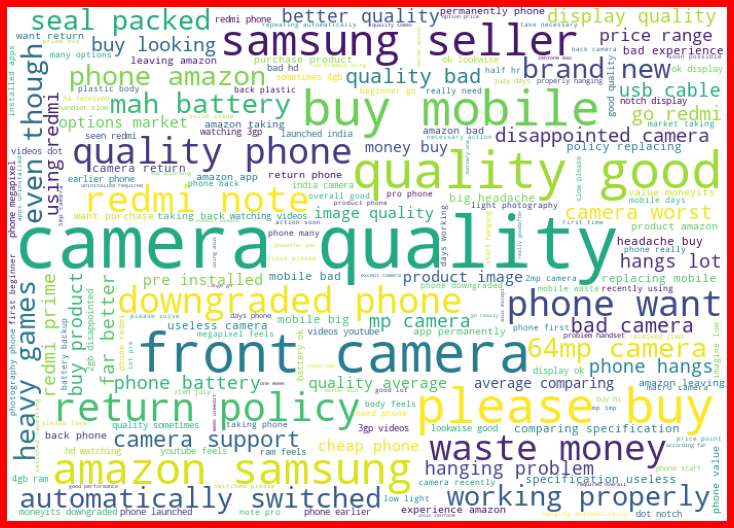

In [ ]:
from wordcloud import WordCloud
#Getting sense of words in Rating 1
one = df_amazon['Product_Review'][df_amazon['Product_Rating']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

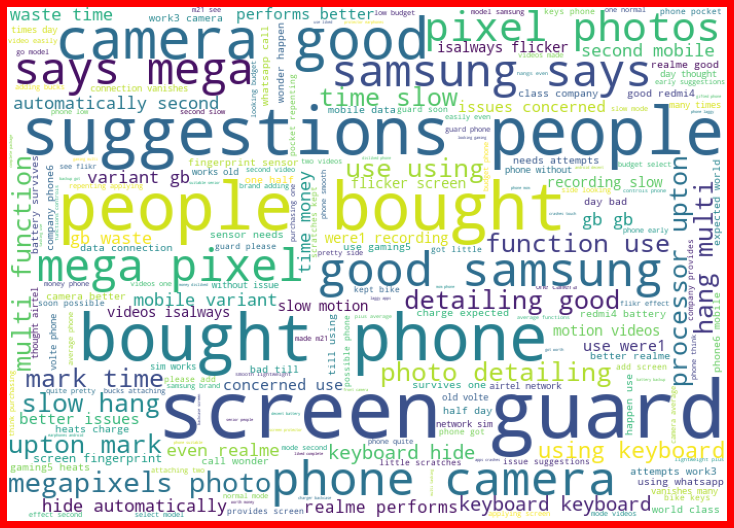

In [ ]:
#Getting sense of words in Rating 2
one = df_amazon['Product_Review'][df_amazon['Product_Rating']==2]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

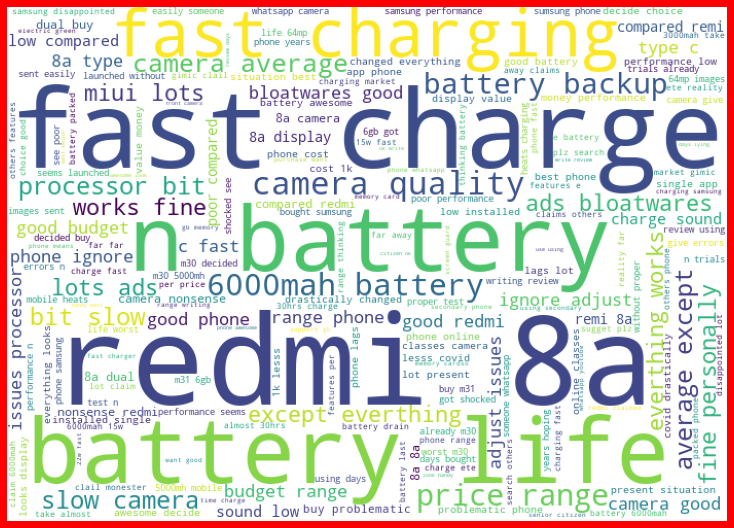

In [ ]:
#Getting sense of words in Rating 3
one = df_amazon['Product_Review'][df_amazon['Product_Rating']==3]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

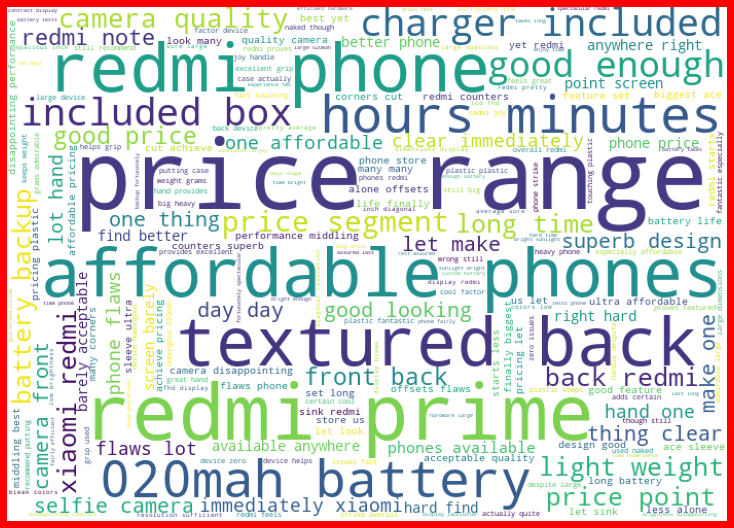

In [ ]:
#Getting sense of words in Rating 4
one = df_amazon['Product_Review'][df_amazon['Product_Rating']==4]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

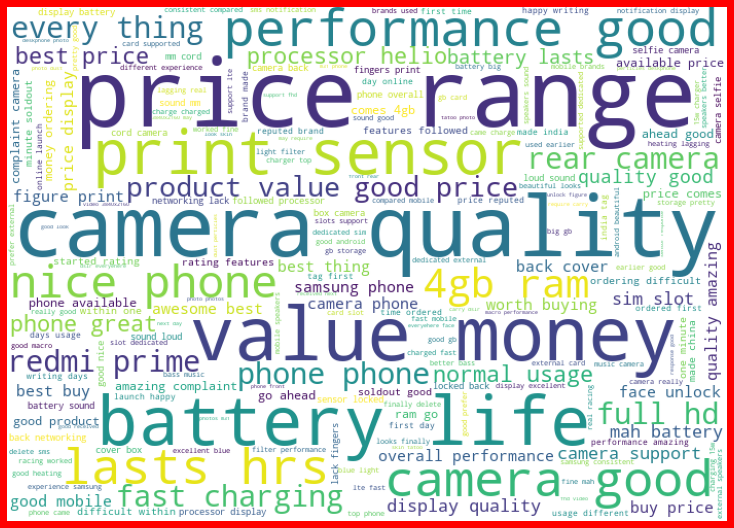

In [ ]:
#Getting sense of words in Rating 5
one = df_amazon['Product_Review'][df_amazon['Product_Rating']==5]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# 1. Convert text into vectors using TF-IDF
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df_amazon['Product_Review'])

x = features
y = df_amazon['Product_Rating']

In [ ]:
print("shape of x is :",x.shape)
print("shape of y is :",y.shape)

shape of x is : (29800, 1357)
shape of y is : (29800,)


# Model Building

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV


# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score


# Creating instances for different Classifiers

LR=LogisticRegression()
MNB=MultinomialNB()
PAC=PassiveAggressiveClassifier()
DT=DecisionTreeClassifier()
Ad=AdaBoostClassifier()
RF=RandomForestClassifier()

In [ ]:
# Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('MultinomialNB',MNB))
models.append(('PassiveAggressiveClassifier',PAC))
models.append(('DecisionTreeClassifier',DT))
models.append(('AdaBoostClassifier',Ad))
models.append(('RandomForestClassifier',RF))

In [ ]:
# Finding best Random State and then calculate Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [ ]:
Model=[]
Score=[]
Acc_score=[]

#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)

#................Classification Report...........................      
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')

*************************** MultinomialNB *****************************


MultinomialNB()


Max Accuracy Score corresponding to Random State  72 is: 0.9210290827740493


Learning Score :  0.9132790028763184
Accuracy Score :  0.9210290827740493
Classification Report:
               precision    recall  f1-score   support

         1.0       0.92      0.97      0.94      3439
         2.0       0.94      0.94      0.94       659
         3.0       0.95      0.90      0.93       895
         4.0       0.95      0.70      0.81      1015
         5.0       0.90      0.94      0.92      2932

    accuracy                           0.92      8940
   macro avg       0.93      0.89      0.91      8940
weighted avg       0.92      0.92      0.92      8940



Confusion Matrix:
 [[3335    6   23   21   54]
 [  24  618    0    7   10]
 [  56   15  808    0   16]
 [  76    0    6  713  220]
 [ 131   21   13    7 2760]]


*************************** PassiveAggressiveClassifier ***********************

In [ ]:
#creating a Dataframe to check all the scores

In [ ]:
score=pd.DataFrame({'Model':Model,'Learning Score':score,'Accuracy Score ':acc_score})
score

,Model,Learning Score,Accuracy Score
0,MultinomialNB,0.938974,0.943848
1,PassiveAggressiveClassifier,0.938974,0.943848
2,DecisionTreeClassifier,0.938974,0.943848
3,AdaBoostClassifier,0.938974,0.943848
4,RandomForestClassifier,0.938974,0.943848


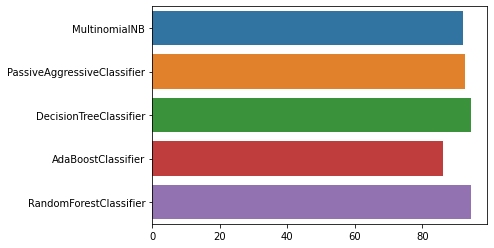

In [ ]:
sns.barplot(y=Model,x=Acc_score)

# As we got two best models Random Forest and Decision Tree both are performed equaly and here we will go with Random Forest because it will avoind overfitting

# Final Model

In [ ]:
#RandomForest Classifier

In [ ]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
print(accuracy_score(y_test,RF_pred))
print(confusion_matrix(y_test,RF_pred))
print(classification_report(y_test,RF_pred))

0.9438478747203579
[[3348    5   19   22   45]
 [  26  619    0    8    6]
 [  73   14  783    9   16]
 [  78    0    5  918   14]
 [ 121   19   13    9 2770]]
              precision    recall  f1-score   support

         1.0       0.92      0.97      0.95      3439
         2.0       0.94      0.94      0.94       659
         3.0       0.95      0.87      0.91       895
         4.0       0.95      0.90      0.93      1015
         5.0       0.97      0.94      0.96      2932

    accuracy                           0.94      8940
   macro avg       0.95      0.93      0.94      8940
weighted avg       0.94      0.94      0.94      8940



In [ ]:
#Lets plot confusion Matrix

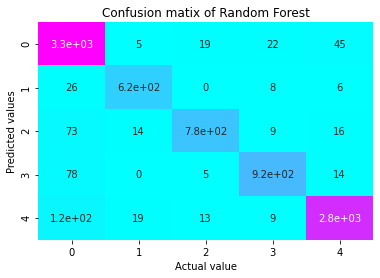

In [ ]:
cm=confusion_matrix(y_test,RF_pred)
sns.heatmap(cm,annot=True,cbar=False,cmap='cool')
plt.xlabel('Actual value')
plt.ylabel('Predicted values')
plt.title('Confusion matix of Random Forest')
plt.show()

In [ ]:
#here we can check the predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=RF_pred

test.to_csv('Ratings_Predict.csv')

test

,Product_Rating,Predicted values
16963,1.0,1.0
29982,5.0,5.0
895,4.0,4.0
22678,5.0,5.0
6105,4.0,4.0
...,...,...
23320,4.0,4.0
13916,1.0,1.0
11178,1.0,1.0
29377,1.0,1.0


In [ ]:
#save the model using joblib
import joblib
joblib.dump(RF,'Rating_Prediction.pkl')

['Rating_Prediction.pkl']